# Mfundo Monchwe 

## NAML841

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(5,0, 100)
a,b,c = 1, 2, 3,
ϵ = np.random.normal(0,0.5,100)
y = a + b*x + c*x**2 + ϵ

In [5]:
class polyreg:
    def __init__(self, x, y,deg):
        self.x = x
        self.y = y
        self.deg = deg
        
    def designMatrix(self):
        return np.c_[np.ones(len(self.x)), self.x, self.x**self.deg]
    
    def poly(self):
        X = self.designMatrix()
        α= np.linalg.inv(X.T.dot(X)).dot(X.T).dot(self.y)
        var = (1/X.shape[0])*(self.y-X.dot(α)).T.dot(self.y-X.dot(α))
        polyfit= np.poly1d(np.flip(α))
        param = [α, var, polyfit]
        return param
    
    def polyplot(self):
        x = np.array([1,2,3,4,5,6,7])
        y = np.array([100, 80, 60,40,60,80,100])
        α,var = self.fit()[0],self.fit()[1]
        y =α[0] + α[1]* x + α[2]* x**self.deg
        plt.scatter(self.x, self.y, label ='data')
        plt.plot(x, y, 'r', label = 'Model')
        plt.plot(x, y+1*np.sqrt(var), 'b', label= 'y+1sd')
        plt.plot(x,y-1*np.sqrt(var),'k', label= 'y-1sd')
        plt.ylabel('y', rotation =0, labelpad = 20)
        plt.xlabel('x', labelpad = 10)
        plt.legend()
        plt.show()
    
    
    
    def fit(self):
        X = self.designMatrix()
        θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(self.y)
        s = (1/X.shape[0])*(self.y-X.dot(θ)).T.dot(self.y-X.dot(θ))
        params = [θ, s]
        return params
    
    def predict(self,x):
        θ = self.fit()[0]
        y = θ[0] + θ[1]* x + θ[2]* x**self.deg
        return y
    
    def ridge(self):
        X = self.designMatrix()
        λ = 10
        I = np.eye(3)
        I[0,0] = 0
        θ_r = np.linalg.inv(X.T.dot(X) + λ*I).dot(X.T).dot(self.y)
        return θ_r
    
    def plot(self):
        x = np.linspace(0, 5, 100)
        θ,s = self.fit()[0],self.fit()[1]
        y = θ[0] + θ[1]* x + θ[2]* x**self.deg
        plt.scatter(self.x, self.y, label ='data')
        plt.plot(x, y, 'r', label = 'Model')
        plt.plot(x, y+2*np.sqrt(s), 'b', label= 'y+2*sd')
        plt.plot(x,y-2*np.sqrt(s),'k', label= 'y-2*sd')
        plt.ylabel('y', rotation =0, labelpad = 20)
        plt.xlabel('x', labelpad = 10)
        plt.legend()
        plt.show()
       

In [15]:
model = polyreg(x,y,3)

In [7]:
model.designMatrix()

array([[1.00000000e+00, 3.85200849e+00, 5.71559842e+01],
       [1.00000000e+00, 3.47030025e+00, 4.17927698e+01],
       [1.00000000e+00, 2.16664024e+00, 1.01709242e+01],
       [1.00000000e+00, 2.92548196e+00, 2.50375755e+01],
       [1.00000000e+00, 4.39345874e+00, 8.48046482e+01],
       [1.00000000e+00, 7.42446981e-01, 4.09257207e-01],
       [1.00000000e+00, 5.63742410e-01, 1.79160441e-01],
       [1.00000000e+00, 3.58319919e+00, 4.60058283e+01],
       [1.00000000e+00, 4.56712597e+00, 9.52640347e+01],
       [1.00000000e+00, 2.47612629e+00, 1.51816290e+01],
       [1.00000000e+00, 2.78098071e+00, 2.15076980e+01],
       [1.00000000e+00, 5.66720635e-01, 1.82014958e-01],
       [1.00000000e+00, 3.79477010e+00, 5.46457525e+01],
       [1.00000000e+00, 2.94070703e-01, 2.54305223e-02],
       [1.00000000e+00, 4.71107525e+00, 1.04558687e+02],
       [1.00000000e+00, 2.61421199e+00, 1.78657975e+01],
       [1.00000000e+00, 2.10190600e+00, 9.28623927e+00],
       [1.00000000e+00, 3.20831

In [8]:
model.fit()

[array([-2.05090497,  8.33320403,  0.38917458]), 1.0888452823483312]

In [16]:
model.poly()

[array([124.81203008, -25.73099415,   0.46783626]),
 39.52738990332975,
 poly1d([  0.46783626, -25.73099415, 124.81203008])]

In [17]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([100,80,60,40,60,80,100])

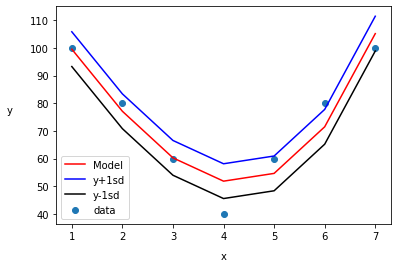

In [18]:
model.polyplot()

In [12]:
model.predict(x)

array([  6.67147365,  17.72889975,  33.45642085,  56.18908443,
        88.26193798, 132.01002901, 189.76840501])

In [13]:
model.ridge()

array([0.68008739, 6.34731663, 0.4627079 ])

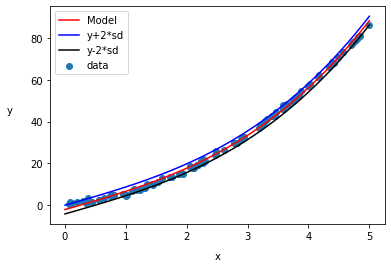

In [14]:
model.plot()